# Convolutional Neural Network.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section: 1
  *   In this section, we will implement and observe the operations of various layers used to build the CNN.
  *   By the end of the workshop, we expect you to be able to:
      1.   Explain the Convolution operation
      2.   Explain the pooling operation
      3.   Get familiar with various hyperparameters i.e. stride, padding

*   Section: 2
  *   In this section we will compile all the learning from section 1 to build a basic Convolutional Neural Network using Keras and Tensorflow.
  

##Convolution Summary:

We convolve (slide) a small matrix also known as Filter/kernel, performing element wise matrix multiplications to produce filter-map.

  *   Objective of a convolution operations:
        1.   Apply a set of weights-a filter- to extract local features.
        2.   Use Multiple filters to extract different features.
        3.   Spatially share parameters of each filter.

Mathematically it perform following:
$$ conv(I,K)_{xy} = ∑_{i=1}^{h}\sum_{j=1}^{w}K_{ij}.I_{x+i-1,y+j-1} \tag{1} $$

Where:
- $I$ input image matrix..
-$K$ kernel/Filter used to perform convolution.

Hyper-parameters in Convolution Operations:
*   Number of Filters(K)
*   Size of Filters(F)
*   Stride(S)
*   amount of zero padding(P)

Output Dimensions is given by:

\begin{align}
\mathbf{O}  = \frac{W_{in} -f + 2p}{s} + 1 \tag{2}
\end{align}

### Exercise-1.

Perform following Convolution Operations:

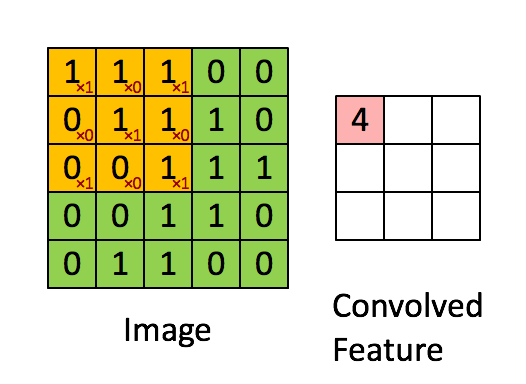

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
# Defining the input matrix as above using np.array function.
I = np.array([[1, 1, 1, 0, 0], [0, 1, 1, 1 ,0], [0, 0, 1, 1, 1,], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]])

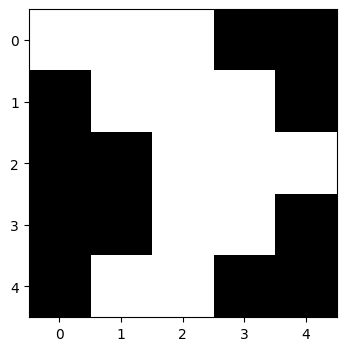

In [ ]:
# Visualizing the input.
plt.imshow(I)

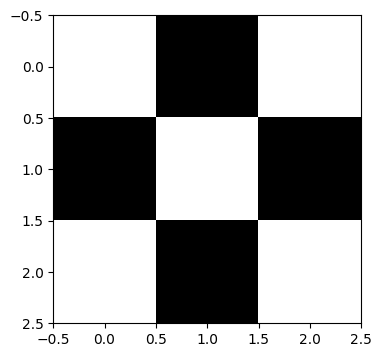

In [ ]:
# Defining the input matrix as above using np.matrix function.
K = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
# Visualizing the Filter.
plt.imshow(K)

In [ ]:
import numpy as np

def convolution(img, filter):
    """
    Function performs convolution operations.

    Arguments:
    img (ndarray): Numpy array of an input image.
    filter (ndarray): Numpy array of an input filter.

    Returns:
    filter_map (ndarray): Filtered output.
    """
    img_dim = img.shape[0]  # Assuming a square image
    filter_dim = filter.shape[0]  # Assuming a square filter

    # Compute the output dimension
    output_dimension = img_dim - filter_dim + 1

    # Initialize the output array
    filter_map = np.zeros((output_dimension, output_dimension))

    # Perform convolution
    for i in range(output_dimension):
        for j in range(output_dimension):
            region = img[i:i+filter_dim, j:j+filter_dim]  # Extract the region
            filter_map[i, j] = np.sum(region * filter)  # Element-wise multiplication and sum

    return filter_map

In [ ]:
img = convolution(I, K)

In [ ]:
assert img.shape == (3, 3), " Convolution Operation did not produce correct output"

Test Passed


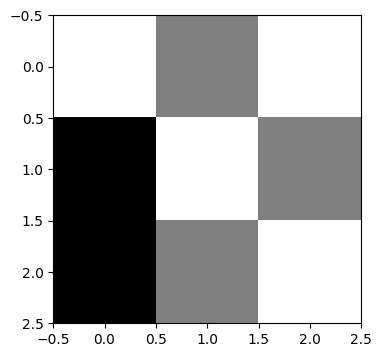

In [ ]:
plt.imshow(img)
print("Test Passed")

# Section-2: In this section we will build very basic CNN architecture, Compile and train our CNN model.

This will be further divided into following sections:


## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/MyDrive/FruitinAmazon"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [ ]:
# Define your dataset directory
dataset_directory = "/content/drive/MyDrive/FruitinAmazon/train"

# Define image size and batch size
img_height = 180
img_width = 180
batch_size = 32

# Load the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 90 files belonging to 6 classes.


In [ ]:
# Define your dataset directory
validation_directory = "/content/drive/MyDrive/FruitinAmazon/train"

# Define image size and batch size
img_height = 180
img_width = 180
batch_size = 32

# Load the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_directory,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 90 files belonging to 6 classes.


In [ ]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


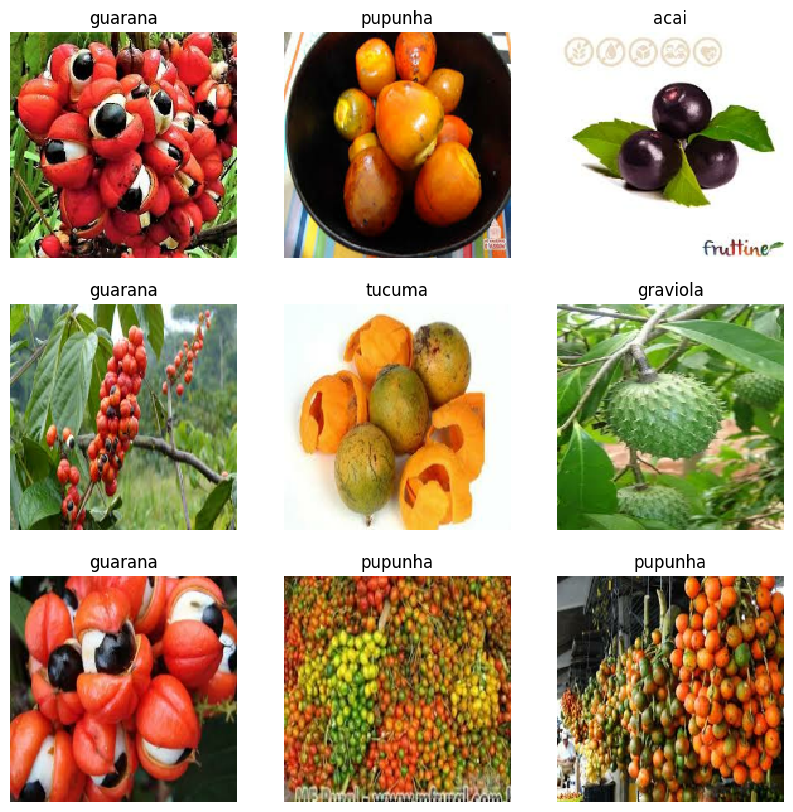

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


## Design CNN Architecture:

For this task, we will build a CNN with following layers:

Feature-Extraction and Convolution Operations.
1.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
2.   Pooling layer[max, F=(2,2), S=2].
3.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
4.   Pooling layer[max, F=(2,2), S=2].

Classification-Assigning a class probabilities to each classes.
1.   Flatten Layer()
2.   Hidden/Dense Layer [number of neurons=128].
3.   Output Layer [number of neurons=num_classes].


### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [ ]:
def generate_model(image_height, image_width, nchannels, num_classes):
    """
    This function will generate a model with a set of hyperparameters defined above.

    Input Args:
    image_height[int] = Height of an image.
    image_width[int] = Width of an image.
    nchannels[int] = Number of channels in image.
    num_classes[int] = Number of classes in dataset.

    Output Args:
    model -> A CNN model.
    """
    model = tf.keras.Sequential([
        # Rescaling and input layer
        layers.Rescaling(1./255, input_shape=(image_height, image_width, nchannels)),

        # First Block of Convolution and Pooling Operations
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Second Block of Convolution and Pooling Operations
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Fully connected classifier
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Output layer
    ])

    return model

img_height = 180
img_width = 180

In [ ]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      16,588,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,609,094 (63.36 MB)

 Trainable params: 16,609,094 (63.36 MB)

 Non-trainable params: 0 (0.00 B)

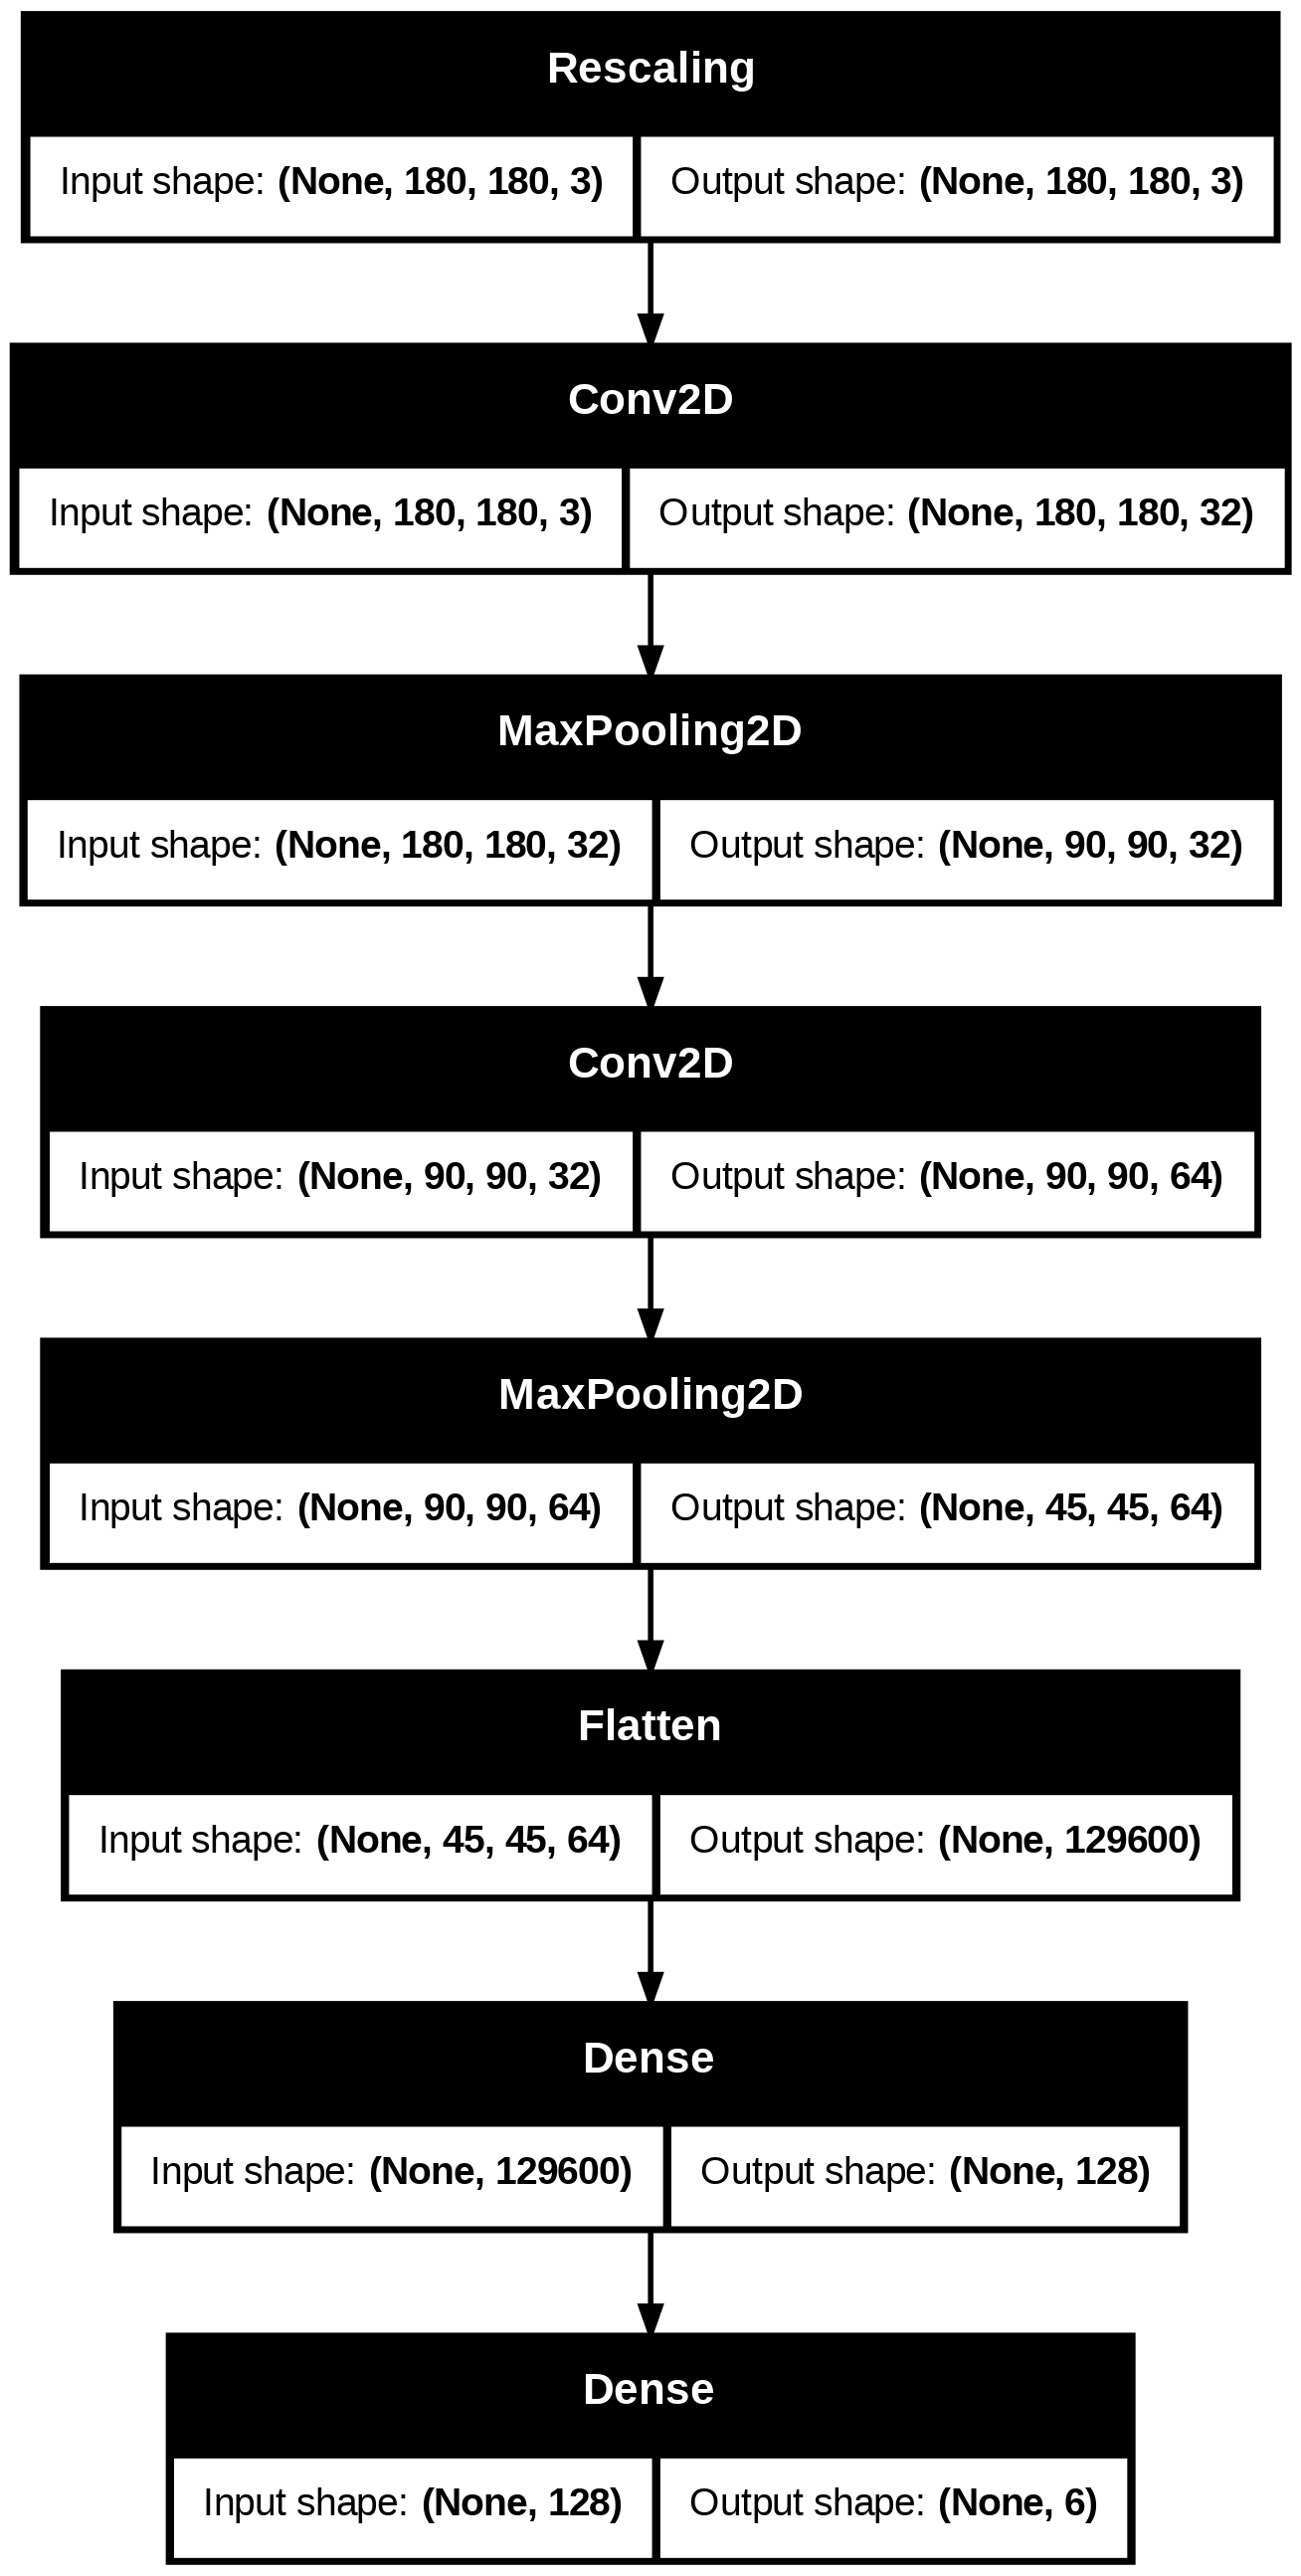

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

## Compile and Train Model.

Once we built the model, we need to compile the model before we start training.

In Model compilation, we do the following:
*   Checks for format Error.
*   Defines the loss function.
*   Defines the optimizer.
*   Defines the learning rate.
*   Defines the metrics we will be using.

For training our model we will be using:
*   loss --> SparseCategoricalCrossEntropy.
*   Optimizer --> Adam.
*   Evaluation Metric --> Accuracy.


In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

### Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.1855 - loss: 10.8702 - val_accuracy: 0.1778 - val_loss: 7.0406
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.1853 - loss: 7.4370 - val_accuracy: 0.3444 - val_loss: 4.4972
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.3680 - loss: 4.4661 - val_accuracy: 0.7556 - val_loss: 1.6794
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5592 - loss: 1.6444 - val_accuracy: 0.4222 - val_loss: 1.3689
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5117 - loss: 1.3168 - val_accuracy: 0.7889 - val_loss: 1.1201
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8274 - loss: 1.0412 - val_accuracy: 0.8333 - val_loss: 0.7153
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.7310 - loss: 0.7365 - val_accuracy: 0.9000 - val_loss: 0.4492
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8992 - loss: 0.4578 - val_accuracy: 0.9667 - val_loss: 0.2531
Epoch 9/10
3/3 ━━━━━━━━

## Observe the Model Performance.


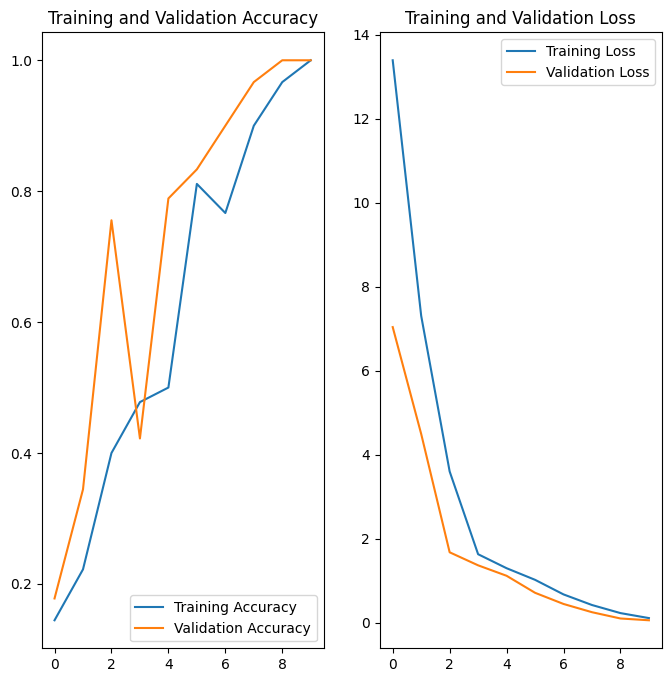

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Home Task:

Create a Test Set and Perform a model evaluation to find the test accuracy.

Based on last week built a function which predicts input examples, and also plot the result.


In [ ]:
# Define your dataset directory
dataset_directory = "/content/drive/MyDrive/FruitinAmazon/test"

# Define image size and batch size
img_height = 180
img_width = 180
batch_size = 32

# Load the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 30 files belonging to 6 classes.


In [ ]:
# Define your dataset directory
validation_directory = "/content/drive/MyDrive/FruitinAmazon/test"

# Define image size and batch size
img_height = 180
img_width = 180
batch_size = 32

# Load the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_directory,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 30 files belonging to 6 classes.


In [ ]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


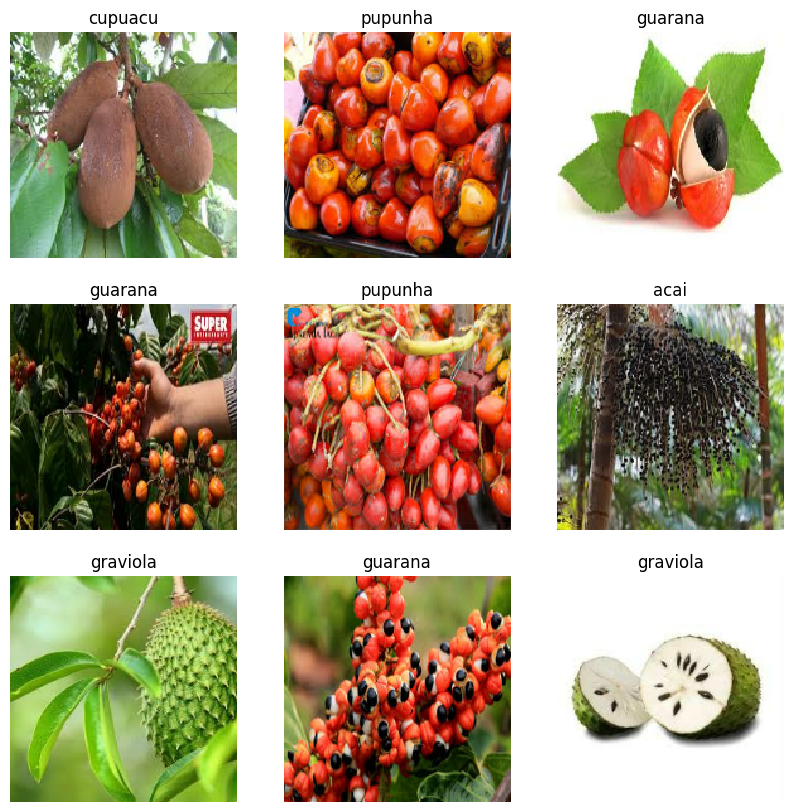

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(30, 180, 180, 3)
(30,)


In [ ]:
def generate_model(image_height, image_width, nchannels, num_classes):
    """
    This function will generate a model with a set of hyperparameters defined above.

    Input Args:
    image_height[int] = Height of an image.
    image_width[int] = Width of an image.
    nchannels[int] = Number of channels in image.
    num_classes[int] = Number of classes in dataset.

    Output Args:
    model -> A CNN model.
    """
    model = tf.keras.Sequential([
        # Rescaling and input layer
        layers.Rescaling(1./255, input_shape=(image_height, image_width, nchannels)),

        # First Block of Convolution and Pooling Operations
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Second Block of Convolution and Pooling Operations
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Fully connected classifier
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Output layer
    ])

    return model

In [ ]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      16,588,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,609,094 (63.36 MB)

 Trainable params: 16,609,094 (63.36 MB)

 Non-trainable params: 0 (0.00 B)

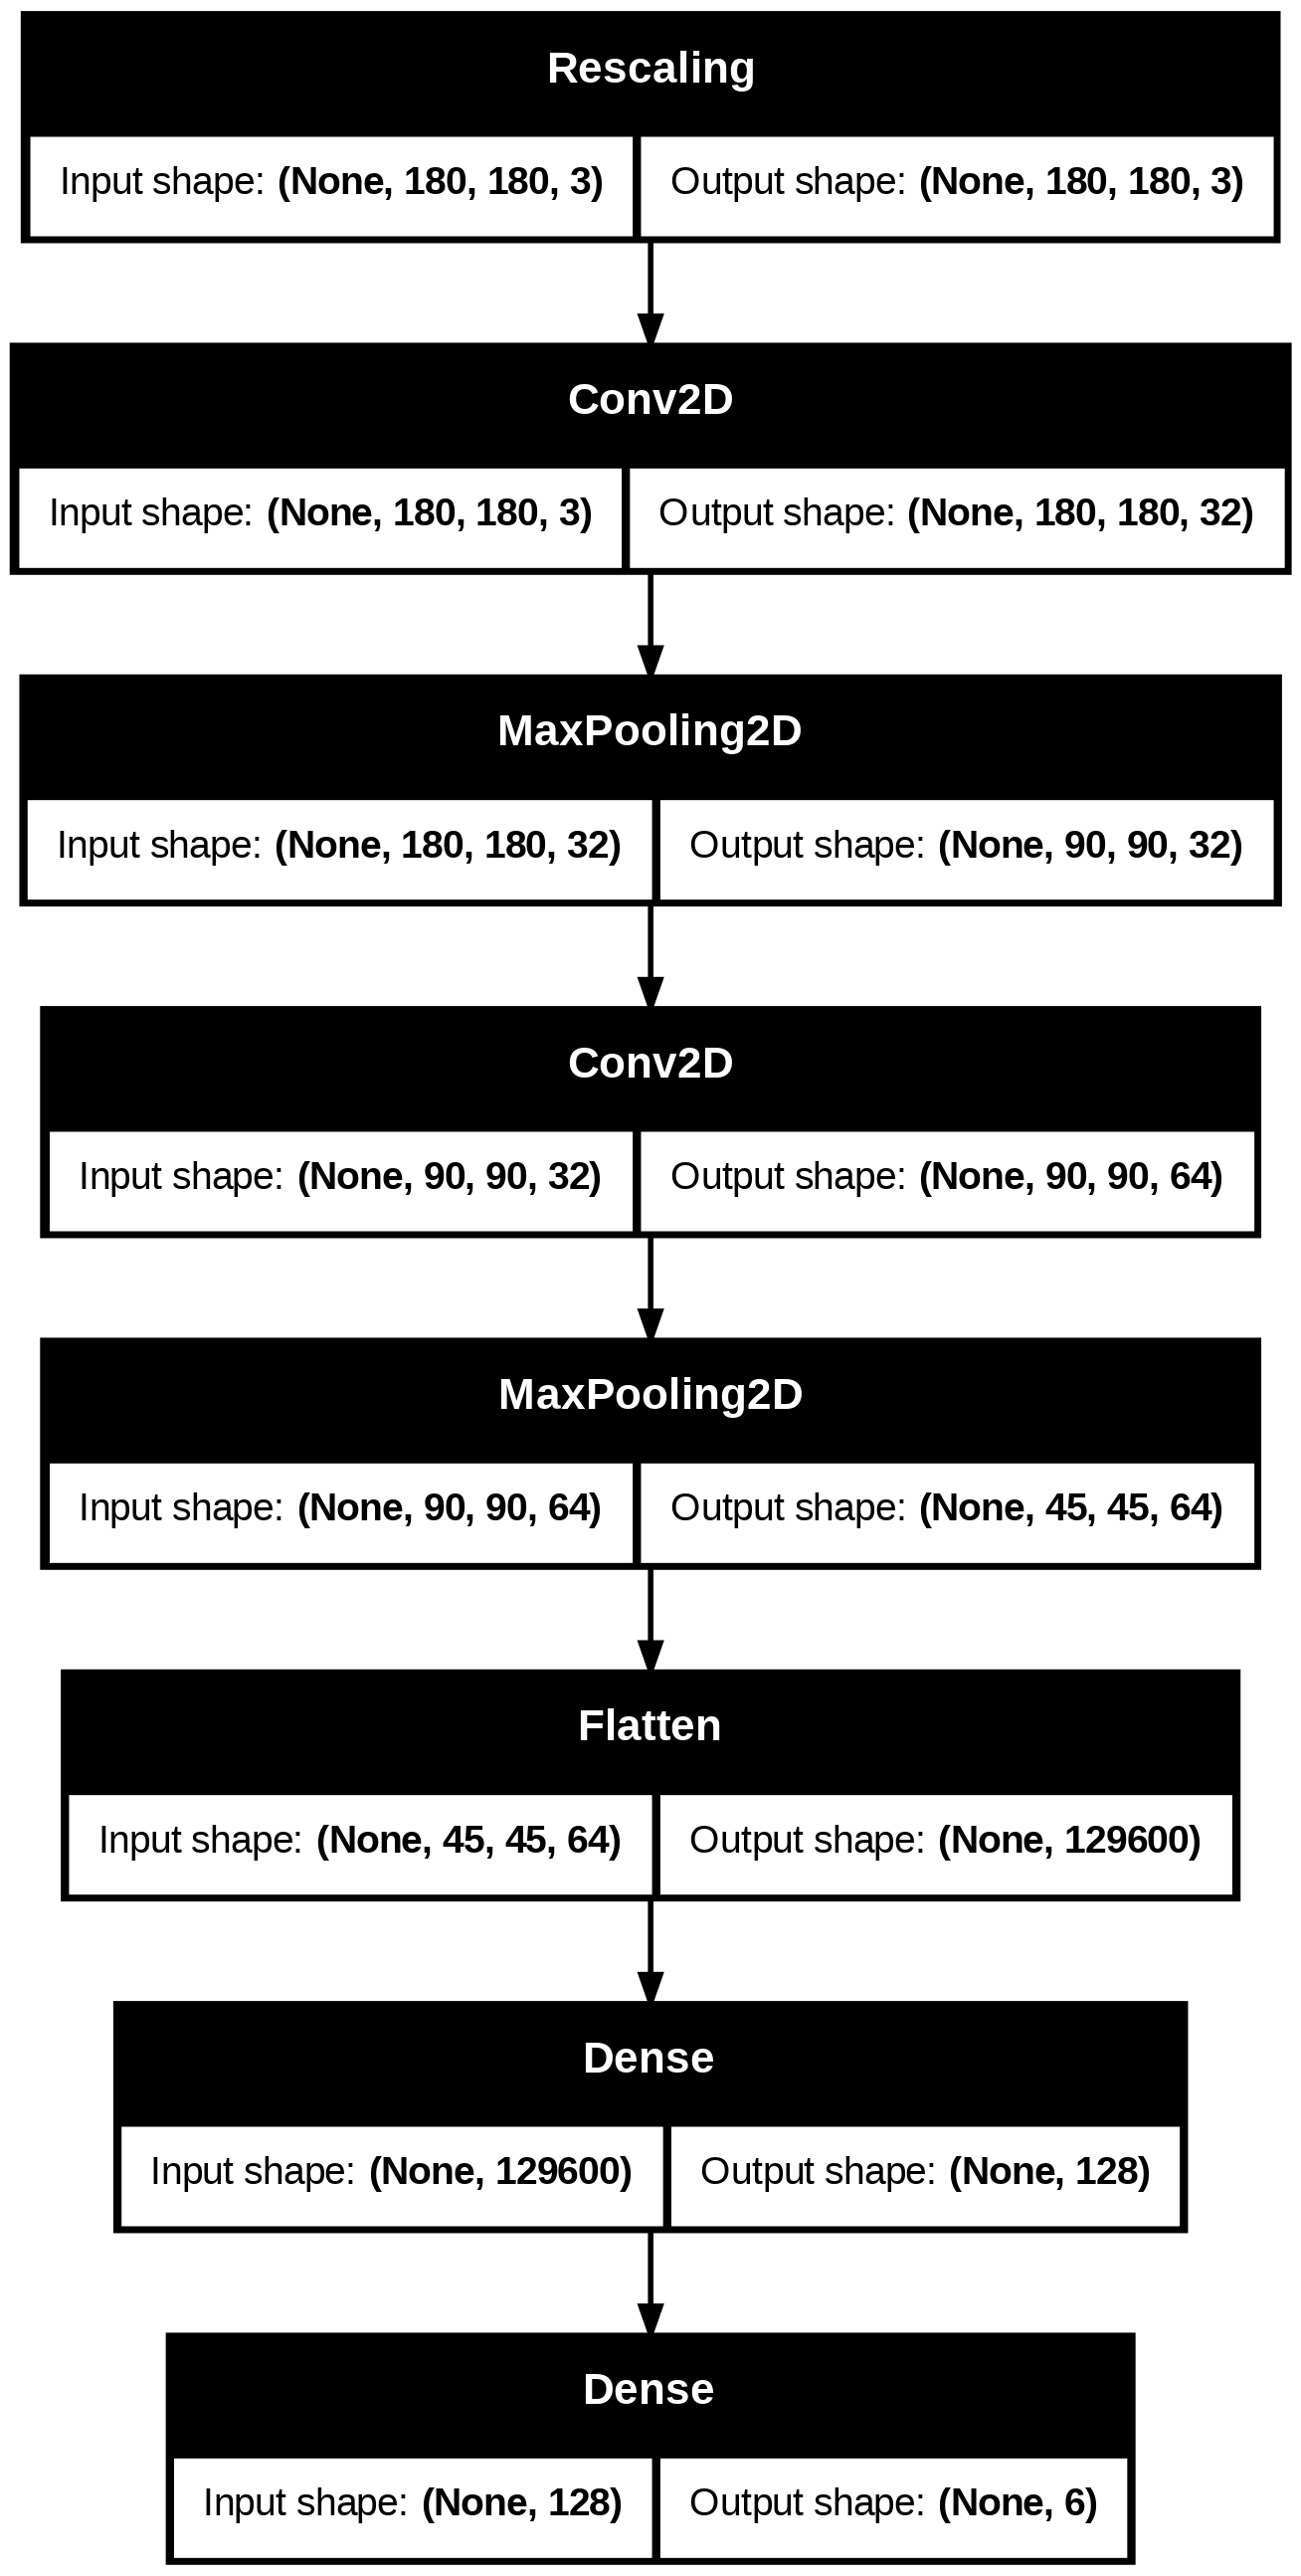

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8667 - loss: 0.6742 - val_accuracy: 0.7333 - val_loss: 0.5920
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7333 - loss: 0.5920 - val_accuracy: 0.9333 - val_loss: 0.3724
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9333 - loss: 0.3724 - val_accuracy: 1.0000 - val_loss: 0.2635
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.2635 - val_accuracy: 1.0000 - val_loss: 0.1286
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.1286 - val_accuracy: 1.0000 - val_loss: 0.0886
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0886 - val_accuracy: 1.0000 - val_loss: 0.0470
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0470 - val_accuracy: 1.0000 - val_loss: 0.0200
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.0000 - loss: 0.0200 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 9/10
1/1 ━

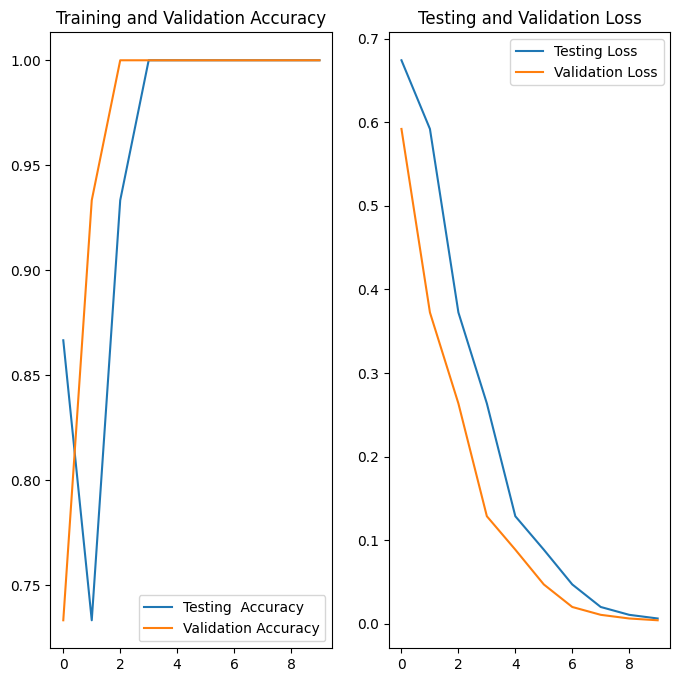

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Testing  Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Testing Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Testing and Validation Loss')
plt.show()